In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Data Load 및 기본 정보 확인

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#경고 무시
import warnings
warnings.filterwarnings('ignore')

# Data Load
train_df = pd.read_csv('/content/drive/MyDrive/EWHA Data Science/[2025-1] 머신러닝원리와응용/Homework/train.csv')
train_df.head()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday,shares,y
0,17335,9.0,409.0,0.501326,1.0,0.587361,23.0,2.0,11.0,0.0,...,-0.1875,-0.1,0.50,0.500,0.00,0.500,Lifestyle,NaN,801,0
1,21242,10.0,317.0,0.725086,1.0,0.830097,6.0,3.0,NaN,21.0,...,-0.6000,NaN,0.00,0.000,0.50,0.000,Lifestyle,Tuesday,426,0
2,9448,11.0,447.0,0.584091,1.0,0.730104,NaN,1.0,1.0,1.0,...,-0.5000,-0.1,0.75,0.125,0.25,0.125,World,Friday,2400,1
3,36797,13.0,143.0,0.638298,NaN,0.787500,3.0,2.0,NaN,0.0,...,0.0000,0.0,1.00,NaN,0.50,0.500,Social Media,NaN,1100,0
4,29504,17.0,576.0,0.524412,1.0,0.714286,8.0,3.0,NaN,0.0,...,-1.0000,-0.1,0.00,0.000,0.50,0.000,World,Wednesday,1500,1


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/EWHA Data Science/[2025-1] 머신러닝원리와응용/Homework/test.csv')
test_df.head()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday
0,4979,6.0,486.0,0.579832,1.0,0.747573,NaN,0.0,1.0,0.0,...,0.5,-0.260000,-0.5500,-0.100000,0.0,0.000000,0.500000,0.000000,World,Tuesday
1,15552,12.0,422.0,0.497537,1.0,0.618868,NaN,0.0,NaN,0.0,...,0.7,-0.325000,-1.0000,-0.125000,NaN,0.000000,0.500000,0.000000,Business,Tuesday
2,29370,7.0,374.0,0.549598,NaN,0.697674,7.0,4.0,NaN,0.0,...,0.6,NaN,NaN,-0.100000,0.0,0.000000,0.500000,0.000000,Tech,Thursday
3,37272,NaN,181.0,0.720670,1.0,0.783333,10.0,NaN,1.0,NaN,...,0.4,-0.185714,-0.3000,-0.071429,0.0,0.000000,0.500000,0.000000,Entertainment,Monday
4,6836,NaN,299.0,0.602740,1.0,0.769663,2.0,1.0,1.0,NaN,...,0.5,-0.204167,-0.3125,-0.100000,NaN,0.068182,0.227273,0.068182,Entertainment,NaN


In [ ]:
# 데이터 정보 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22200 entries, 0 to 22199
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            22200 non-null  int64  
 1   n_tokens_title                20000 non-null  float64
 2   n_tokens_content              20054 non-null  float64
 3   n_unique_tokens               19942 non-null  float64
 4   n_non_stop_words              20017 non-null  float64
 5   n_non_stop_unique_tokens      19944 non-null  float64
 6   num_hrefs                     19967 non-null  float64
 7   num_self_hrefs                19920 non-null  float64
 8   num_imgs                      19986 non-null  float64
 9   num_videos                    19906 non-null  float64
 10  average_token_length          19987 non-null  float64
 11  num_keywords                  19955 non-null  float64
 12  kw_min_min                    19984 non-null  float64
 13  k

In [ ]:
# 데이터 정보 확인
train_df.describe()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,y
count,22200.000000,20000.000000,20054.000000,19942.000000,20017.000000,19944.000000,19967.000000,19920.000000,19986.000000,19906.000000,...,20033.000000,19916.000000,19926.000000,19997.000000,19928.000000,19967.000000,19934.000000,19951.000000,22200.000000,22200.000000
mean,19856.270045,10.387150,543.920614,0.530611,0.970175,0.672893,10.840337,3.303263,4.473431,1.248669,...,0.755952,-0.259972,-0.523223,-0.107647,0.284772,0.070169,0.342966,0.155305,3459.794865,0.495676
std,11469.556277,2.105585,460.694982,0.138709,0.170108,0.155004,11.024976,3.944523,8.092647,4.087507,...,0.248262,0.127974,0.289365,0.096059,0.327151,0.264686,0.188498,0.225603,12767.254516,0.499993
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,22.000000,0.000000
25%,9948.750000,9.000000,246.000000,0.471005,1.000000,0.626836,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.329167,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,948.000000,0.000000
50%,19931.000000,10.000000,409.000000,0.539683,1.000000,0.691228,7.000000,3.000000,1.000000,0.000000,...,0.800000,-0.253718,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,1400.000000,0.000000
75%,29780.250000,12.000000,715.750000,0.609865,1.000000,0.754545,14.000000,4.000000,4.000000,1.000000,...,1.000000,-0.187500,-0.300000,-0.050000,0.500000,0.138600,0.500000,0.250000,2800.000000,1.000000
max,39644.000000,19.000000,7413.000000,1.000000,1.000000,1.000000,186.000000,116.000000,108.000000,91.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,1.000000


In [ ]:
# numeric 변수 컬럼의 최솟값이 0인 컬럼들의 리스트
numeric_cols = train_df.select_dtypes(include=[np.float64, np.int64]).columns
cols_with_min_zero = [col for col in numeric_cols if train_df[col].min() == 0]
cols_with_min_zero

['n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'kw_max_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'global_subjectivity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'title_subjectivity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity',
 'y']

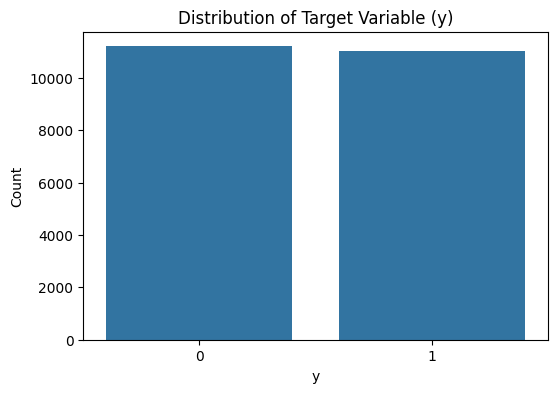

In [ ]:
# target 변수의 분포 확인
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=train_df)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

In [ ]:
train_df.columns

Index(['id', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'data_c


```
No,Variable,Description
0,id,Identifier
1,n_tokens_title,Number of words in the title
2,n_tokens_content,Number of words in the content
3,n_unique_tokens,Rate of unique words in the content
4,n_non_stop_words,Rate of non-stop words in the content
5,n_non_stop_unique_tokens,Rate of unique non-stop words in the content
6,num_hrefs,Number of links
7,num_self_hrefs,Number of links to other articles published by Mashable
8,num_imgs,Number of images
9,num_videos,Number of videos
10,average_token_length,Average length of the words in the content
11,num_keywords,Number of keywords in the metadata
12,kw_min_min,Worst keyword (min. shares)
13,kw_max_min,Worst keyword (max. shares)
14,kw_avg_min,Worst keyword (avg. shares)
15,kw_min_max,Best keyword (min. shares)
16,kw_max_max,Best keyword (max. shares)
17,kw_avg_max,Best keyword (avg. shares)
18,kw_min_avg,Avg. keyword (min. shares)
19,kw_max_avg,Avg. keyword (max. shares)
20,kw_avg_avg,Avg. keyword (avg. shares)
21,self_reference_min_shares,Min. shares of referenced articles in Mashable
22,self_reference_max_shares,Max. shares of referenced articles in Mashable
23,self_reference_avg_sharess,Avg. shares of referenced articles in Mashable
24,LDA_00,Closeness to LDA topic 0
25,LDA_01,Closeness to LDA topic 1
26,LDA_02,Closeness to LDA topic 2
27,LDA_03,Closeness to LDA topic 3
28,LDA_04,Closeness to LDA topic 4
29,global_subjectivity,Text subjectivity
30,global_sentiment_polarity,Text sentiment polarity
31,global_rate_positive_words,Rate of positive words in the content
32,global_rate_negative_words,Rate of negative words in the content
33,rate_positive_words,Rate of positive words among non-neutral tokens
34,rate_negative_words,Rate of negative words among non-neutral tokens
35,avg_positive_polarity,Avg. polarity of positive words
36,min_positive_polarity,Min. polarity of positive words
37,max_positive_polarity,Max. polarity of positive words
38,avg_negative_polarity,Avg. polarity of negative
39,min_negative_polarity,Min. polarity of negative
40,max_negative_polarity,Max. polarity of negative
41,title_subjectivity,Title subjectivity
42,title_sentiment_polarity,Title polarity
43,abs_title_subjectivity,Absolute subjectivity level
44,abs_title_sentiment_polarity,Absolute polarity level
45,data_channel ,Data channel
46,weekday ,Published weekday
```


In [ ]:
# object 타입 컬럼을 제외한 numerical 컬럼 선택
numeric_cols = train_df.select_dtypes(exclude=['object']).columns

# y와의 상관계수 확인
corr = train_df[numeric_cols].corr()['y'].sort_values(ascending=False)
corr

,y
y,1.000000
shares,0.198287
kw_avg_avg,0.160963
LDA_04,0.089543
kw_min_avg,0.087915
num_hrefs,0.083695
kw_max_avg,0.079436
num_keywords,0.070231
LDA_00,0.067945
global_sentiment_polarity,0.064011


2. Missing Value imputation

In [ ]:
y_train = train_df['y']

In [ ]:
# 필요없는 컬럼 삭제
train_df = train_df.drop(['id', 'shares', 'y'], axis=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

train_df_imputed = train_df.copy()

# numerical 컬럼은 iterative imputer로 결측치 채우기
numeric_cols = train_df_imputed.select_dtypes(include=['number']).columns

imputer = IterativeImputer(random_state=42)
train_df_imputed[numeric_cols] = imputer.fit_transform(train_df_imputed[numeric_cols])

train_df_imputed.isna().sum()

,0
n_tokens_title,0
n_tokens_content,0
n_unique_tokens,0
n_non_stop_words,0
n_non_stop_unique_tokens,0
num_hrefs,0
num_self_hrefs,0
num_imgs,0
num_videos,0
average_token_length,0


In [ ]:
# 개수, 숫자, 비율과 같이 항상 양수인 컬럼에 대해서는 음수 값을 0으로 집어넣기
for col in cols_with_min_zero:
    if col in train_df_imputed.columns:
        train_df_imputed[col] = train_df_imputed[col].apply(lambda x: max(x, 0))

In [ ]:
# object 컬럼 선택
object_cols = train_df_imputed.select_dtypes(include=['object']).columns

# object 컬럼의 결측치는 최빈값으로 채우기
for col in object_cols:
  train_df_imputed[col] = train_df_imputed[col].fillna(train_df_imputed[col].mode()[0])

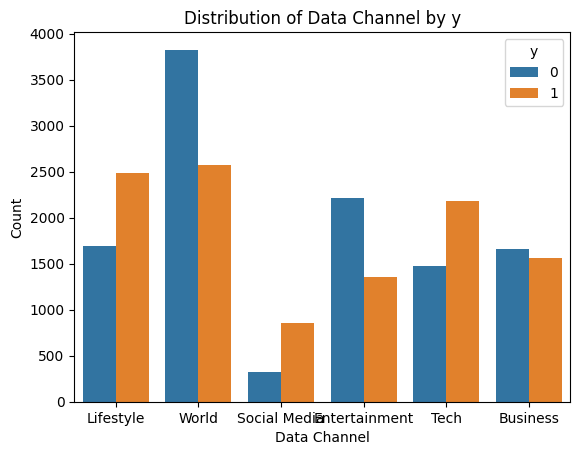

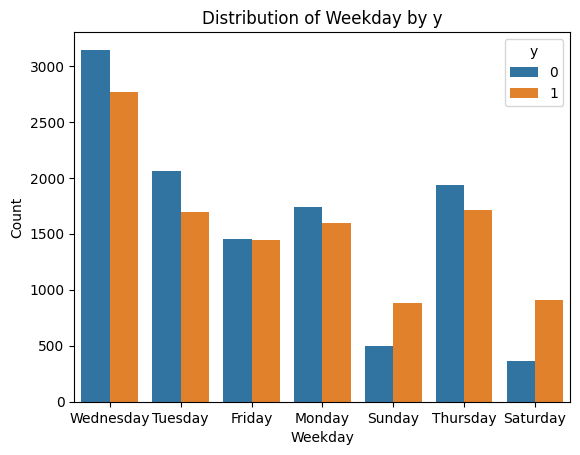

In [ ]:
count_plot_df = train_df_imputed.copy()
count_plot_df['y'] = y_train

sns.countplot(x='data_channel', hue='y', data=count_plot_df)
plt.title('Distribution of Data Channel by y')
plt.xlabel('Data Channel')
plt.ylabel('Count')
plt.show()

sns.countplot(x='weekday', hue='y', data=count_plot_df)
plt.title('Distribution of Weekday by y')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

3. EDA + Preprocessing

In [ ]:
train_df_preprocessed = train_df_imputed.copy()

In [ ]:
# 수치형, 범주형 컬럼 구분
numeric_cols = train_df_preprocessed.select_dtypes(include=['int','float']).columns
categ_cols = train_df_preprocessed.select_dtypes(include=['object', 'bool']).columns

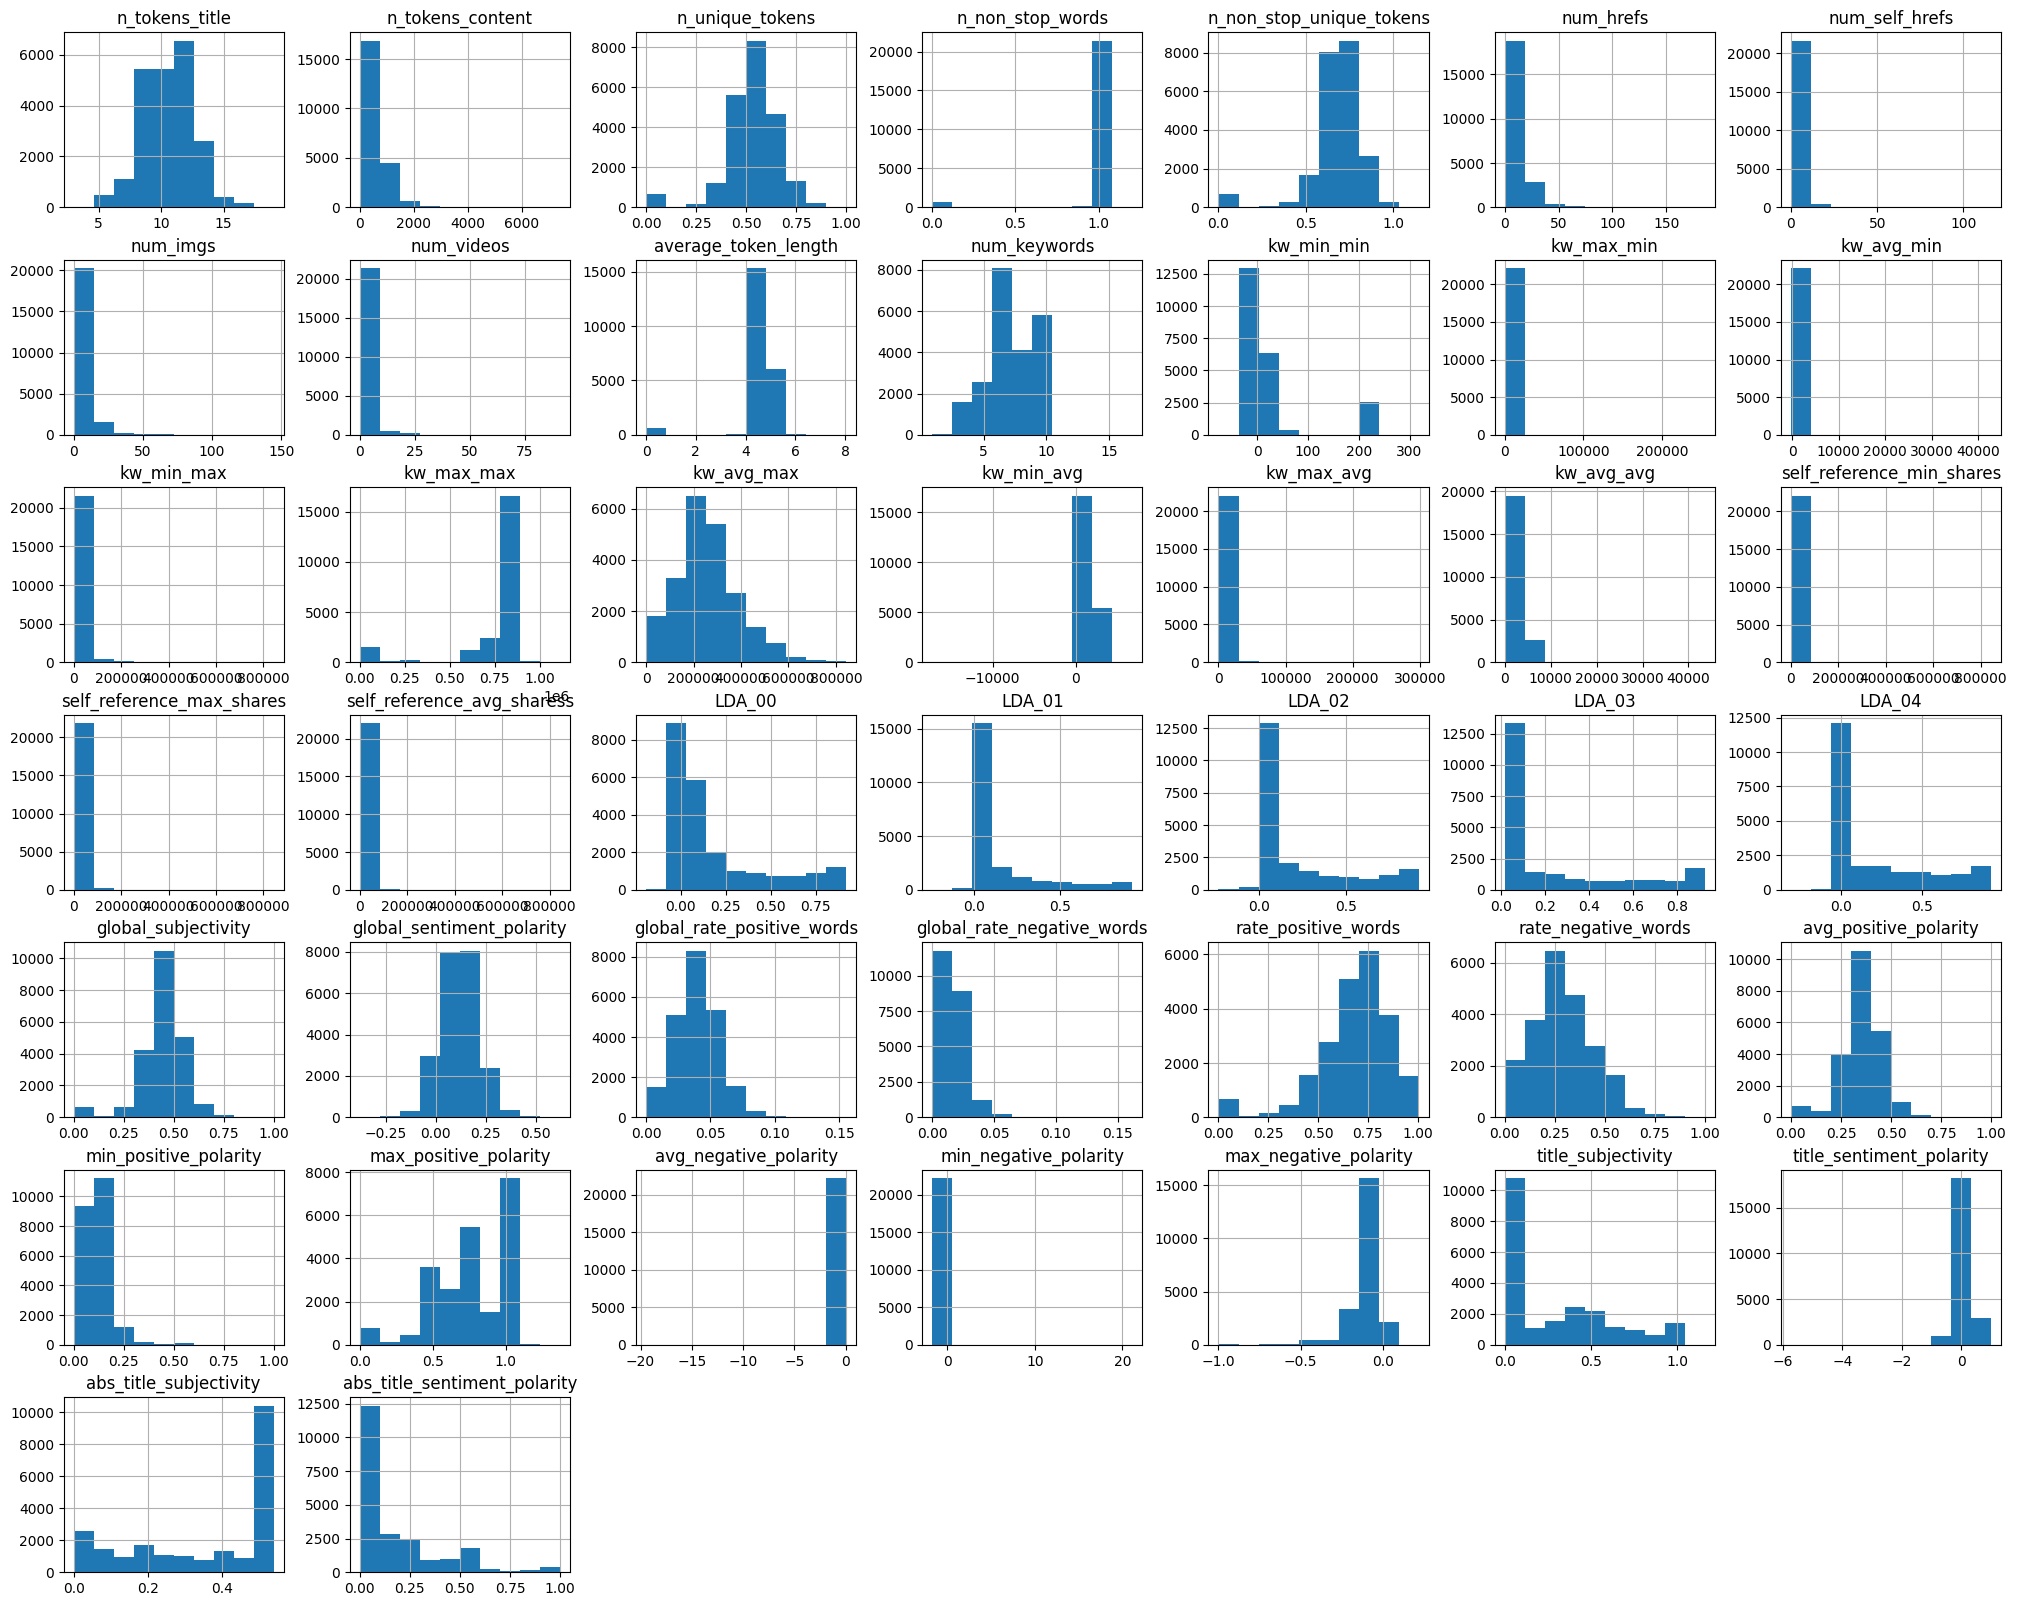

In [ ]:
# 수치형 변수 Distribution
train_df_preprocessed[numeric_cols].hist(figsize=(25, 20))
plt.show()

In [ ]:
# Positive Skew + Negative Skew지만 쌍봉분포인 컬럼: Log(x+1) 변환
positive_skewed_cols = ['n_tokens_content', 'n_non_stop_words', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess',
 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
 'global_rate_positive_words', 'global_rate_negative_words', 'max_positive_polarity', 'title_subjectivity',
 'abs_title_subjectivity', 'abs_title_sentiment_polarity']

print(len(positive_skewed_cols))

train_df_preprocessed[positive_skewed_cols].describe()

29


,n_tokens_content,n_non_stop_words,num_hrefs,num_self_hrefs,num_imgs,num_videos,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,...,LDA_01,LDA_02,LDA_03,LDA_04,global_rate_positive_words,global_rate_negative_words,max_positive_polarity,title_subjectivity,abs_title_subjectivity,abs_title_sentiment_polarity
count,22200.000000,22200.000000,22200.000000,22200.000000,22200.000000,22200.000000,22200.000000,22200.000000,22200.000000,22200.000000,...,22200.000000,22200.000000,22200.000000,22200.000000,22200.000000,22200.000000,22200.000000,22200.000000,22200.000000,22200.000000
mean,544.498292,0.969810,10.888006,3.299863,4.510202,1.266767,26.295693,1157.728299,313.665268,13811.985270,...,0.140788,0.217255,0.224856,0.231385,0.039804,0.016636,0.756111,0.284464,0.342741,0.156033
std,452.793615,0.170468,10.773622,3.791003,7.880962,3.904173,68.950684,3860.905949,652.301737,53327.651406,...,0.218511,0.282208,0.291264,0.286667,0.017329,0.010633,0.244757,0.319860,0.181615,0.220917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-76.541336,0.000000,-287.379064,0.000000,...,-0.242178,-0.236859,0.018182,-0.311257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,247.000000,1.000000,4.143178,1.000000,1.000000,0.000000,-1.000000,441.000000,144.237500,0.000000,...,0.025014,0.028363,0.028572,0.028573,0.028846,0.009709,0.600000,0.000000,0.168324,0.000000
50%,418.000000,1.000000,8.000000,2.990991,1.000000,0.000000,-1.000000,665.000000,235.837500,1500.000000,...,0.033353,0.040014,0.040016,0.050000,0.039552,0.015504,0.800000,0.150000,0.433333,0.025624
75%,727.098791,1.000000,14.000000,4.000000,5.000000,1.000000,4.000000,1100.000000,356.157143,9700.000000,...,0.153188,0.343029,0.361986,0.395276,0.050459,0.021834,1.000000,0.500000,0.500000,0.250000
max,7413.000000,1.203931,186.000000,116.000000,144.524517,91.000000,318.000000,254680.151757,42827.857143,843300.000000,...,0.919976,0.919999,0.925542,0.927119,0.155488,0.162037,1.370148,1.161794,0.540248,1.000000


In [ ]:
# Positive Skew + Negative Skew지만 쌍봉분포인 컬럼: Log(x+1) 변환
for col in positive_skewed_cols:
  train_df_preprocessed[col] = np.maximum(0, train_df_preprocessed[col])
  train_df_preprocessed[col] = np.log1p(train_df_preprocessed[col])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22200 entries, 0 to 22199
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_tokens_content              22200 non-null  float64
 1   n_non_stop_words              22200 non-null  float64
 2   num_hrefs                     22200 non-null  float64
 3   num_self_hrefs                22200 non-null  float64
 4   num_imgs                      22200 non-null  float64
 5   num_videos                    22200 non-null  float64
 6   kw_min_min                    22200 non-null  float64
 7   kw_max_min                    22200 non-null  float64
 8   kw_avg_min                    22200 non-null  float64
 9   kw_min_max                    22200 non-null  float64
 10  kw_max_max                    22200 non-null  float64
 11  kw_avg_max                    22200 non-null  float64
 12  kw_min_avg                    22200 non-null  float64
 13  k

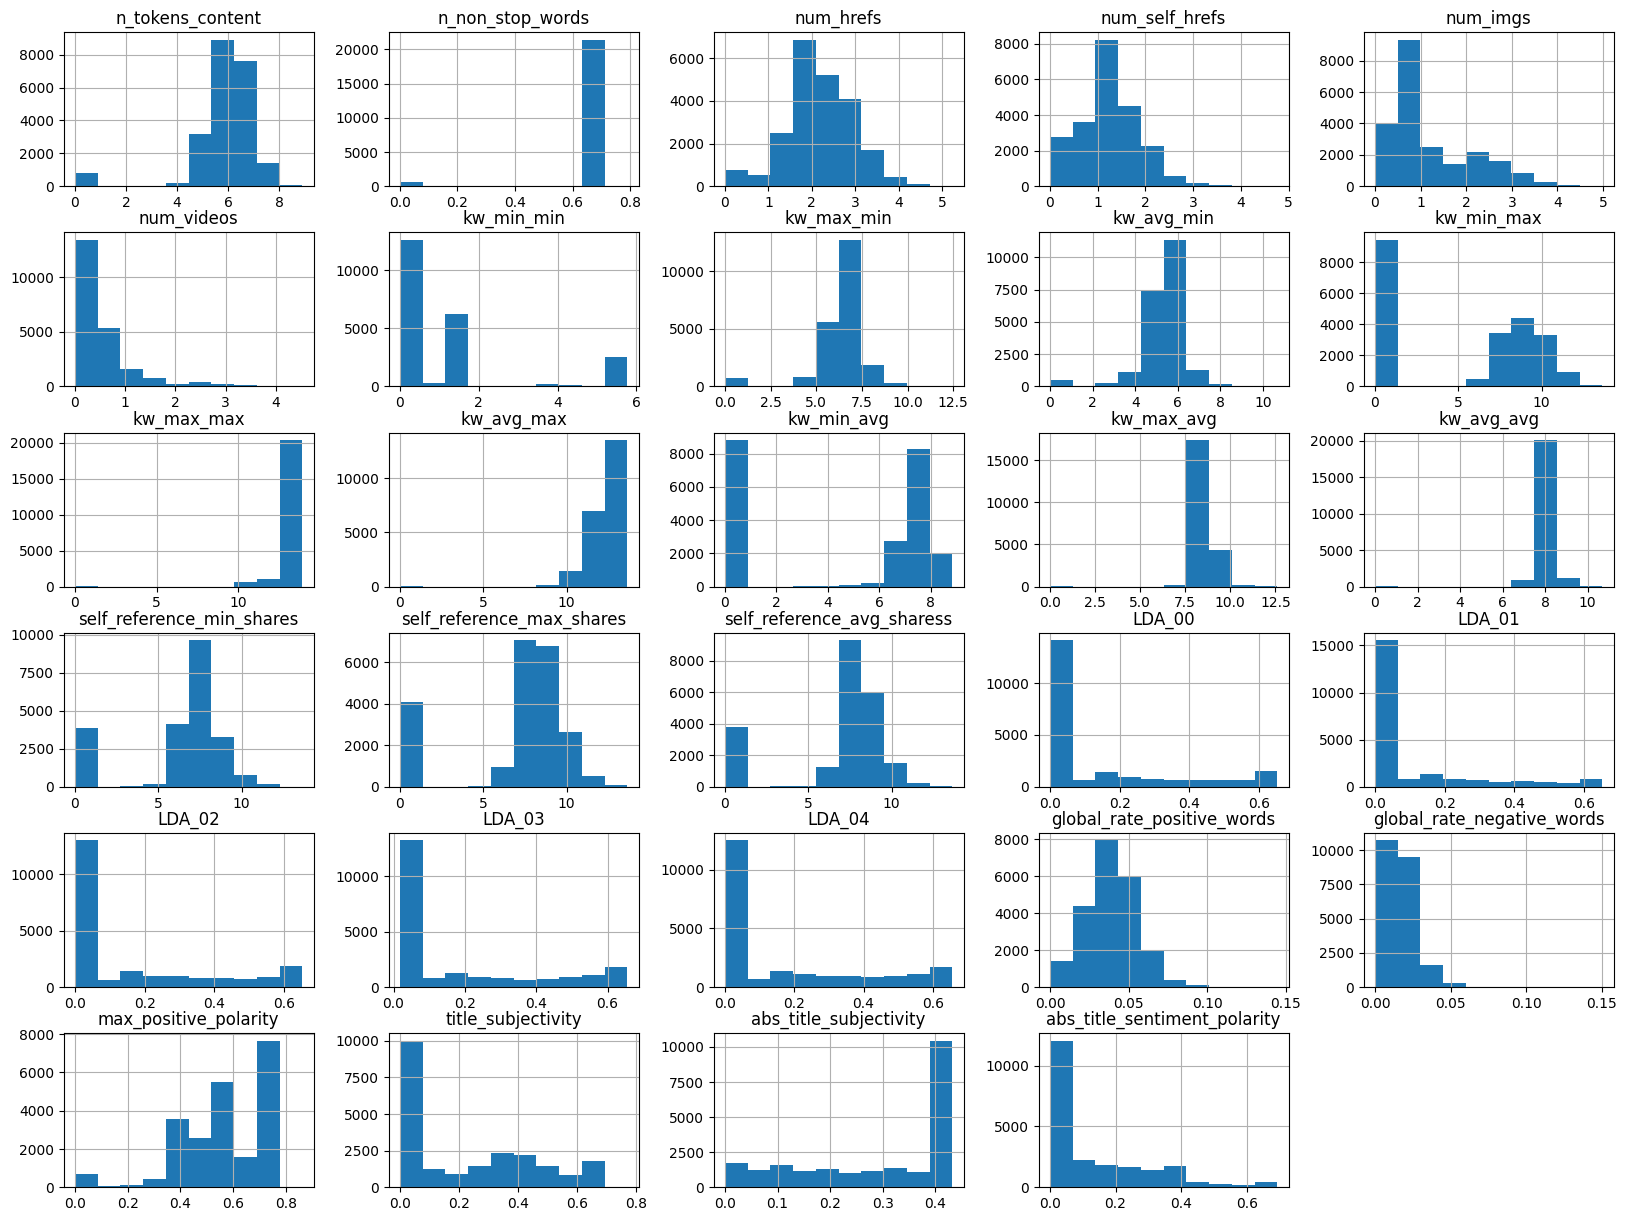

In [ ]:
# 변환 후 Distribution 확인
train_df_preprocessed[positive_skewed_cols].hist(figsize=(20, 15))
train_df_preprocessed[positive_skewed_cols].info()

2


array([[<Axes: title={'center': 'avg_negative_polarity'}>,
        <Axes: title={'center': 'max_negative_polarity'}>]], dtype=object)

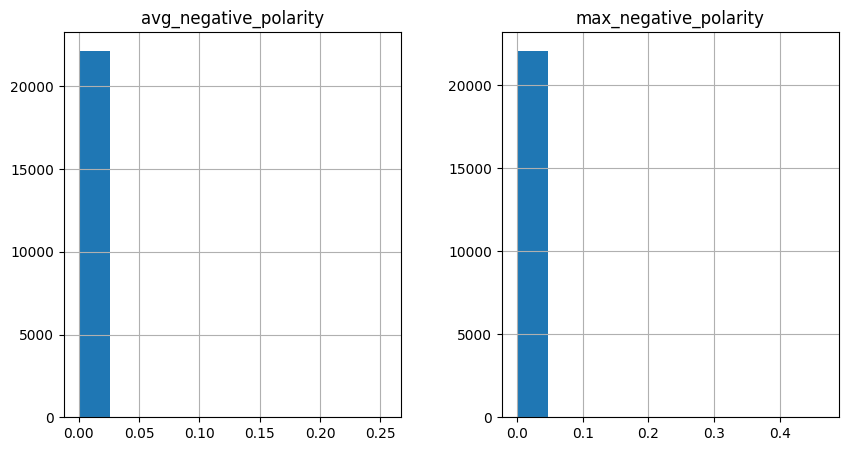

In [ ]:
# 음수값을 가지는 Negative Skew : 제곱근 변환
negative_skewed_cols = ['avg_negative_polarity', 'max_negative_polarity']
print(len(negative_skewed_cols))

for col in negative_skewed_cols:
  train_df_preprocessed[col] = np.maximum(0, train_df_preprocessed[col])
  train_df_preprocessed[col] = np.sqrt(train_df_preprocessed[col])

# 변환 후 Distribution 확인
train_df_preprocessed[negative_skewed_cols].hist(figsize=(10, 5))

4. Encoding + Scaling

In [ ]:
# 범주형 컬럼 : One-hot encoding
train_df_preprocessed = pd.get_dummies(train_df_preprocessed, columns=categ_cols)
train_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22200 entries, 0 to 22199
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_tokens_title                22200 non-null  float64
 1   n_tokens_content              22200 non-null  float64
 2   n_unique_tokens               22200 non-null  float64
 3   n_non_stop_words              22200 non-null  float64
 4   n_non_stop_unique_tokens      22200 non-null  float64
 5   num_hrefs                     22200 non-null  float64
 6   num_self_hrefs                22200 non-null  float64
 7   num_imgs                      22200 non-null  float64
 8   num_videos                    22200 non-null  float64
 9   average_token_length          22200 non-null  float64
 10  num_keywords                  22200 non-null  float64
 11  kw_min_min                    22200 non-null  float64
 12  kw_max_min                    22200 non-null  float64
 13  k

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

train_df_scaled = scaler.fit_transform(train_df_preprocessed)
train_df_scaled = pd.DataFrame(train_df_scaled, columns=train_df_preprocessed.columns)
train_df_scaled

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,data_channel_Social Media,data_channel_Tech,data_channel_World,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,-0.333333,-0.020161,-0.286474,0.065952,-0.821183,0.916337,-0.311503,1.630930,0.000000,-0.195605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,-0.256098,1.343466,-0.159913,1.103820,-0.234790,0.002461,-0.630930,4.459432,-0.116421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.333333,0.062137,0.316412,0.117004,0.310831,0.191851,-0.754010,0.000000,1.000000,0.836676,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,-0.991690,0.711273,95183.104544,0.766007,-0.757609,-0.311503,0.588237,0.000000,-0.399302,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.333333,0.297093,-0.118307,0.213151,0.185387,0.000000,0.002461,-0.356551,0.000000,1.002976,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22195,0.000000,0.614996,-0.367550,0.146603,-0.279785,0.177729,-0.754010,0.000000,1.844592,-0.080262,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22196,0.666667,1.676847,-1.566658,0.669646,-1.546271,2.017492,1.812179,2.299480,0.000000,-0.107687,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22197,0.000000,-0.581449,0.765484,-0.635081,0.784683,-0.549138,-0.311503,0.000000,0.000000,-0.525458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22198,0.000000,0.322489,-0.772275,0.228447,-0.720947,0.255067,0.758932,0.000000,1.000000,0.428723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_df_scaled, y_train, test_size=0.2, random_state=42)

5. 베이스라인 모델 구축

In [ ]:
!pip install catboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
# 분류 모델 정의
lo = LogisticRegression()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
svm = SVC()
xgb = XGBClassifier()
lgbm = LGBMClassifier()
cat = CatBoostClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

models = {
    'Logistic Regression': lo,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Gradient Boosting': gb,
    'Decision Tree': dt,
    'SVM': svm,
    'XGBoost': xgb,
    'LightGBM': lgbm,
    'CatBoost': cat
}

results = {}

for name, model in models.items():
    print(f"Train {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob) if y_prob is not None else 'N/A'

    results[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }
    print(f"{name} - Accuracy: {accuracy:.4f}, F1: {f1:.4f}, ROC AUC: {roc_auc}\n")

results_df = pd.DataFrame(results).T

Train Logistic Regression
Logistic Regression - Accuracy: 0.4892, F1: 0.4901, ROC AUC: 0.48652835400725314

Train Random Forest
Random Forest - Accuracy: 0.6516, F1: 0.6510, ROC AUC: 0.7122097228870266

Train AdaBoost
AdaBoost - Accuracy: 0.6527, F1: 0.6553, ROC AUC: 0.6994249192072561

Train Gradient Boosting
Gradient Boosting - Accuracy: 0.6610, F1: 0.6593, ROC AUC: 0.7192639079481149

Train Decision Tree
Decision Tree - Accuracy: 0.5689, F1: 0.5672, ROC AUC: 0.5689117921998655

Train SVM
SVM - Accuracy: 0.5045, F1: 0.0525, ROC AUC: N/A

Train XGBoost
XGBoost - Accuracy: 0.6428, F1: 0.6410, ROC AUC: 0.6945140473963806

Train LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8791, number of negative: 8969
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `for

In [ ]:
results_df

,Accuracy,F1 Score,ROC AUC
Logistic Regression,0.489189,0.490108,0.486528
Random Forest,0.651577,0.651026,0.71221
AdaBoost,0.652703,0.655342,0.699425
Gradient Boosting,0.661036,0.659271,0.719264
Decision Tree,0.568919,0.567164,0.568912
SVM,0.504505,0.052541,N/A
XGBoost,0.642793,0.641014,0.694514
LightGBM,0.665541,0.667264,0.718264
CatBoost,0.660811,0.662332,0.723496


In [ ]:
!pip install optuna

In [ ]:
# LightGBM 하이퍼파라미터 튜닝
import optuna

def objective(trial):
  params = {
      'num_leaves': trial.suggest_int('num_leaves', 20, 40),
      'n_estimators': trial.suggest_int('n_estimators', 100, 200),
      'max_depth': trial.suggest_int('max_depth', 10, 20),
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
      'random_state': 42,
      'verbose': -1
  }

  model = LGBMClassifier(**params)

  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  accuracy = accuracy_score(y_val, y_pred)
  f1 = f1_score(y_val, y_pred)
  roc_auc = roc_auc_score(y_val, y_pred)

  score = (accuracy + f1 ++ roc_auc)/3
  return score

In [ ]:
# Optuna 스터디 생성
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

[I 2025-06-06 13:10:21,539] A new study created in memory with name: no-name-74bc6c9b-2f5e-4742-abe8-bde3a04b7ebd
[I 2025-06-06 13:10:24,625] Trial 0 finished with value: 0.662626643304225 and parameters: {'num_leaves': 33, 'n_estimators': 131, 'max_depth': 19, 'learning_rate': 0.011709377917387962}. Best is trial 0 with value: 0.662626643304225.
[I 2025-06-06 13:10:29,815] Trial 1 finished with value: 0.6653202575443878 and parameters: {'num_leaves': 23, 'n_estimators': 171, 'max_depth': 13, 'learning_rate': 0.05953736688257658}. Best is trial 1 with value: 0.6653202575443878.
[I 2025-06-06 13:10:34,304] Trial 2 finished with value: 0.6667722084909312 and parameters: {'num_leaves': 30, 'n_estimators': 185, 'max_depth': 11, 'learning_rate': 0.02986097840103886}. Best is trial 2 with value: 0.6667722084909312.
[I 2025-06-06 13:10:37,190] Trial 3 finished with value: 0.6661718008021891 and parameters: {'num_leaves': 23, 'n_estimators': 143, 'max_depth': 18, 'learning_rate': 0.05798937317

KeyboardInterrupt: 

In [ ]:
# Catboost 하이퍼파라미터 튜닝

def objective(trial):

  params = {
      'iterations': trial.suggest_int('iterations', 50, 100),
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
      'depth': trial.suggest_int('depth', 5, 10),
      'random_state': 42,
      'subsample': trial.suggest_float('subsample', 0.6, 0.9),
      'verbose': False,
      'early_stopping_rounds': 10,
  }

  model = CatBoostClassifier(**params)

  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  accuracy = accuracy_score(y_val, y_pred)
  f1 = f1_score(y_val, y_pred)
  roc_auc = roc_auc_score(y_val, y_pred)

  score = (accuracy + f1 ++ roc_auc)/3
  return score

In [ ]:
study2 = optuna.create_study(direction='maximize')
study2.optimize(objective, n_trials=30)

In [ ]:
lgbm_best_params = {'num_leaves': 24, 'n_estimators': 136, 'max_depth': 13, 'learning_rate': 0.019110853749908372}
lgbm_best = LGBMClassifier(**lgbm_best_params, random_state=42)

cat_best_params = {'iterations': 53, 'learning_rate': 0.07656691733806491, 'depth': 7, 'subsample': 0.7580848998424531}
cat_best = CatBoostClassifier(**cat_best_params, random_state=42, verbose=False)

In [ ]:
# prompt: 위에 두 best 모델 accuracy f1 auc 랑 세개 스코어의 합/3을 구해줘

# 베스트 모델 평가
lgbm_best.fit(X_train, y_train)
y_pred_lgbm = lgbm_best.predict(X_val)
y_prob_lgbm = lgbm_best.predict_proba(X_val)[:, 1]

accuracy_lgbm = accuracy_score(y_val, y_pred_lgbm)
f1_lgbm = f1_score(y_val, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_val, y_prob_lgbm)

cat_best.fit(X_train, y_train)
y_pred_cat = cat_best.predict(X_val)
y_prob_cat = cat_best.predict_proba(X_val)[:, 1]

accuracy_cat = accuracy_score(y_val, y_pred_cat)
f1_cat = f1_score(y_val, y_pred_cat)
roc_auc_cat = roc_auc_score(y_val, y_prob_cat)

print("LightGBM Best Model:")
print(f"Accuracy: {accuracy_lgbm:.4f}")
print(f"F1 Score: {f1_lgbm:.4f}")
print(f"ROC AUC: {roc_auc_lgbm:.4f}")

print("\nCatBoost Best Model:")
print(f"Accuracy: {accuracy_cat:.4f}")
print(f"F1 Score: {f1_cat:.4f}")
print(f"ROC AUC: {roc_auc_cat:.4f}")

# 두 베스트 모델의 세 스코어 합/3 계산
avg_score_lgbm = (accuracy_lgbm + f1_lgbm + roc_auc_lgbm) / 3
avg_score_cat = (accuracy_cat + f1_cat + roc_auc_cat) / 3

print(f"\nLightGBM Best Model Average Score: {avg_score_lgbm:.4f}")
print(f"CatBoost Best Model Average Score: {avg_score_cat:.4f}")


LightGBM Best Model:
Accuracy: 0.6703
F1 Score: 0.6717
ROC AUC: 0.7201

CatBoost Best Model:
Accuracy: 0.6669
F1 Score: 0.6662
ROC AUC: 0.7212

LightGBM Best Model Average Score: 0.6874
CatBoost Best Model Average Score: 0.6848


In [ ]:
# LGBM + Catboost Best model을 soft voting ensemble
from sklearn.ensemble import VotingClassifier

# 베스트 모델 2개 학습
lgbm_best.fit(X_train, y_train)
cat_best.fit(X_train, y_train)

# 소프트 보팅 앙상블 모델 정의
voting_clf = VotingClassifier(
    estimators=[('lgbm', lgbm_best), ('catboost', cat_best)],
    voting='soft'
)

# 앙상블 모델 학습
voting_clf.fit(X_train, y_train)

# 검증 데이터에 대한 예측
y_pred_ensemble = voting_clf.predict(X_val)
y_prob_ensemble = voting_clf.predict_proba(X_val)[:, 1]

# 앙상블 모델 성능 계산
accuracy_ensemble = accuracy_score(y_val, y_pred_ensemble)
f1_ensemble = f1_score(y_val, y_pred_ensemble)
roc_auc_ensemble = roc_auc_score(y_val, y_prob_ensemble)

# score 계산
score_ensemble = (accuracy_ensemble + f1_ensemble + roc_auc_ensemble )/3

print(f"Ensemble Model (Soft Voting) - Accuracy: {accuracy_ensemble:.4f}, F1: {f1_ensemble:.4f}, ROC AUC: {roc_auc_ensemble:.4f}")
print(f"Score: {score_ensemble}")

Ensemble Model (Soft Voting) - Accuracy: 0.6662, F1: 0.6662, ROC AUC: 0.7228
Score: 0.6850637404418375


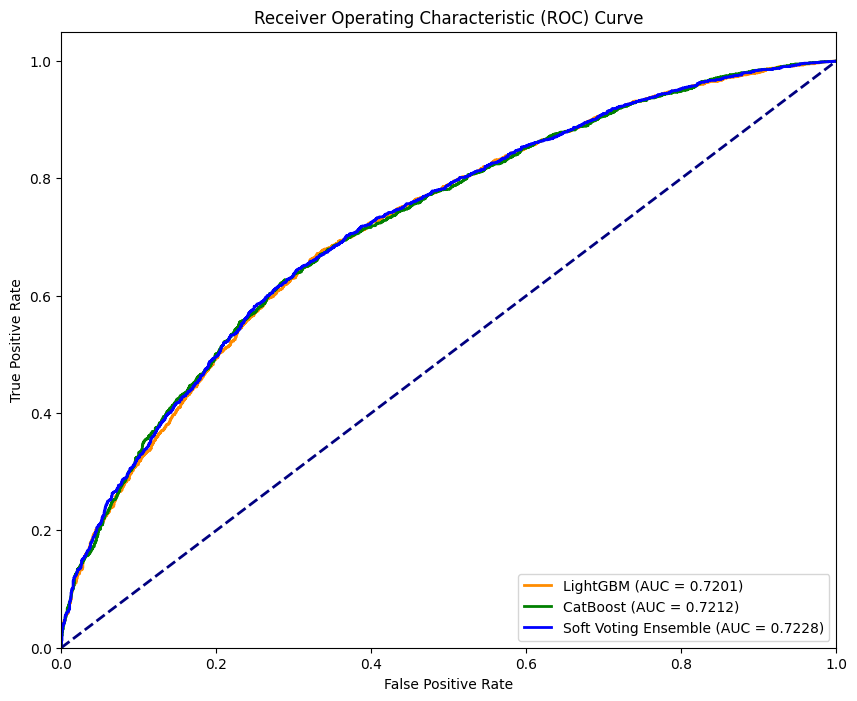

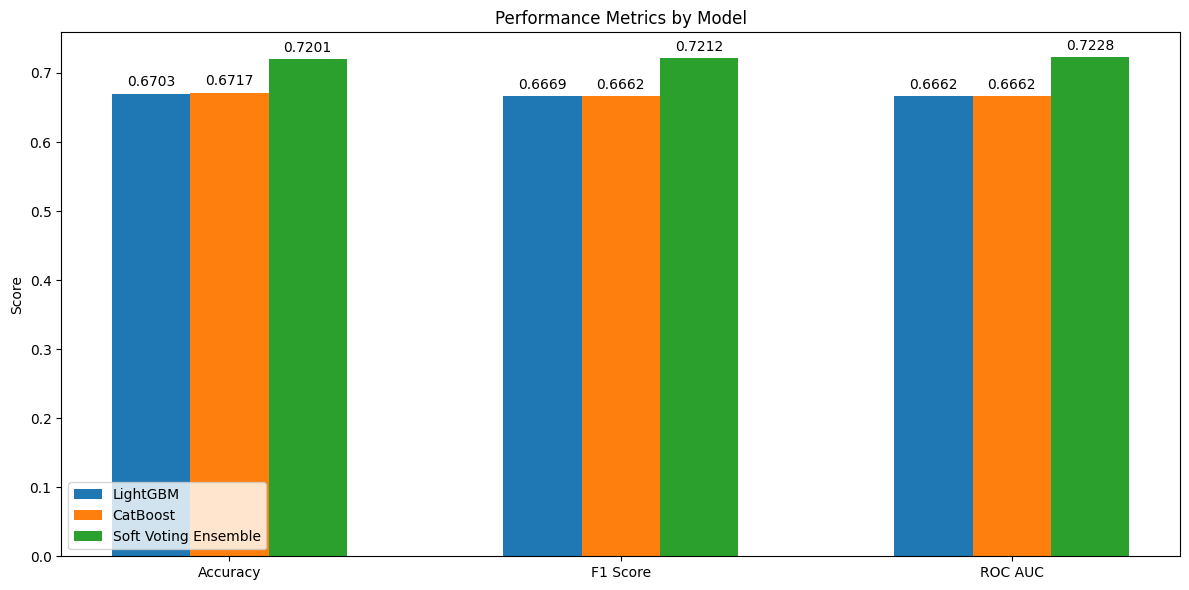

In [ ]:
# prompt: best모델 2개랑 soft vote모델의 평가지표를 시각화해줘. AUC 그래프 그려줄래

from sklearn.metrics import roc_curve, auc

# AUC 그래프 시각화
plt.figure(figsize=(10, 8))

# LightGBM AUC
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_val, y_prob_lgbm)
roc_auc_lgbm_plot = auc(fpr_lgbm, tpr_lgbm)
plt.plot(fpr_lgbm, tpr_lgbm, color='darkorange', lw=2, label=f'LightGBM (AUC = {roc_auc_lgbm_plot:.4f})')

# CatBoost AUC
fpr_cat, tpr_cat, _ = roc_curve(y_val, y_prob_cat)
roc_auc_cat_plot = auc(fpr_cat, tpr_cat)
plt.plot(fpr_cat, tpr_cat, color='green', lw=2, label=f'CatBoost (AUC = {roc_auc_cat_plot:.4f})')

# Soft Voting Ensemble AUC
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_val, y_prob_ensemble)
roc_auc_ensemble_plot = auc(fpr_ensemble, tpr_ensemble)
plt.plot(fpr_ensemble, tpr_ensemble, color='blue', lw=2, label=f'Soft Voting Ensemble (AUC = {roc_auc_ensemble_plot:.4f})')

# Reference line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 평가지표 시각화 (Accuracy, F1 Score, ROC AUC)
metrics = ['Accuracy', 'F1 Score', 'ROC AUC']
models = ['LightGBM', 'CatBoost', 'Soft Voting Ensemble']
scores = {
    'Accuracy': [accuracy_lgbm, accuracy_cat, accuracy_ensemble],
    'F1 Score': [f1_lgbm, f1_cat, f1_ensemble],
    'ROC AUC': [roc_auc_lgbm, roc_auc_cat, roc_auc_ensemble]
}

x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width, scores['Accuracy'], width, label='LightGBM')
rects2 = ax.bar(x, scores['F1 Score'], width, label='CatBoost')
rects3 = ax.bar(x + width, scores['ROC AUC'], width, label='Soft Voting Ensemble')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Performance Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


fig.tight_layout()
plt.show()

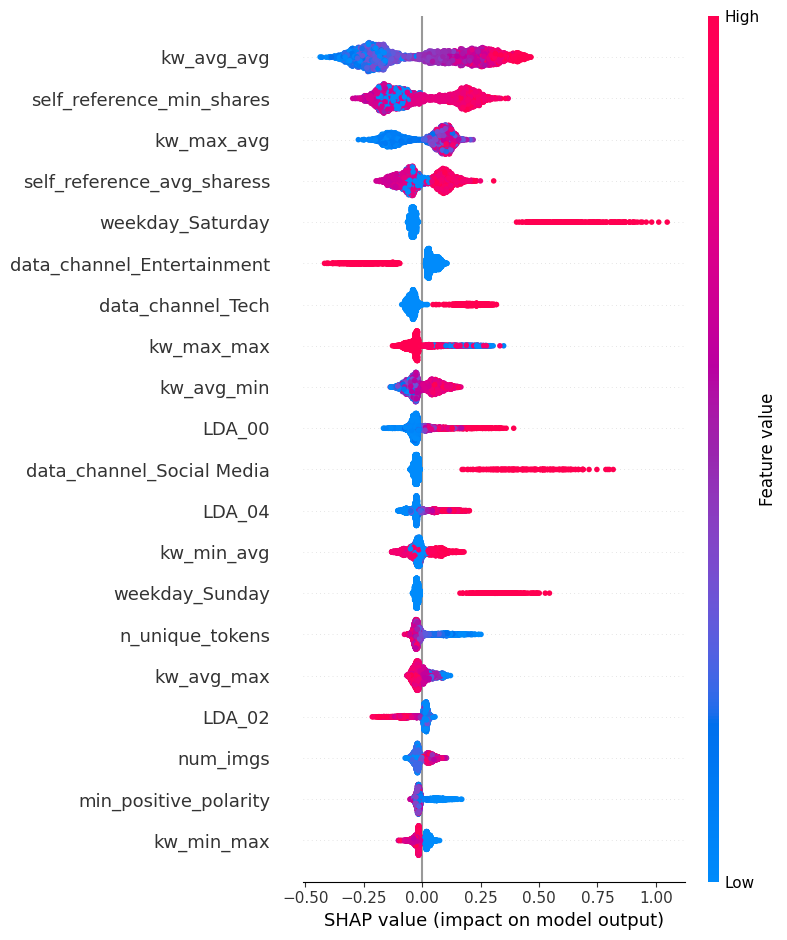

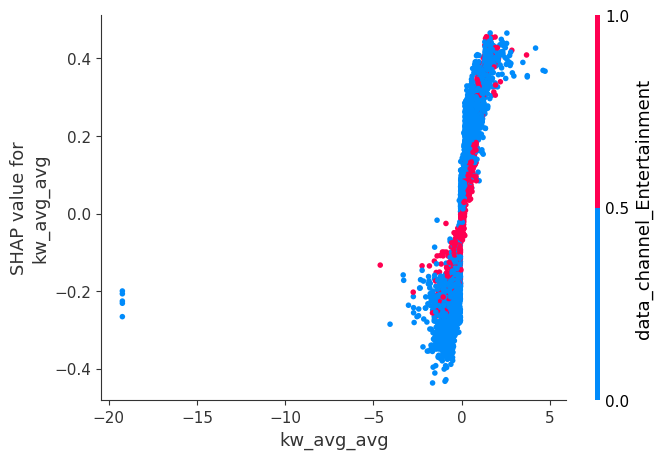

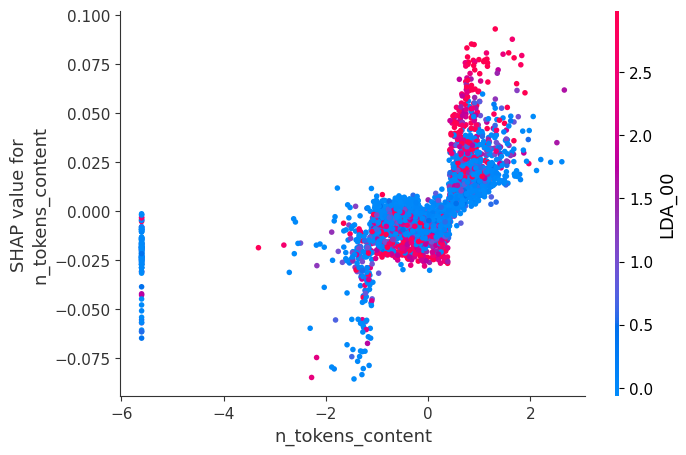

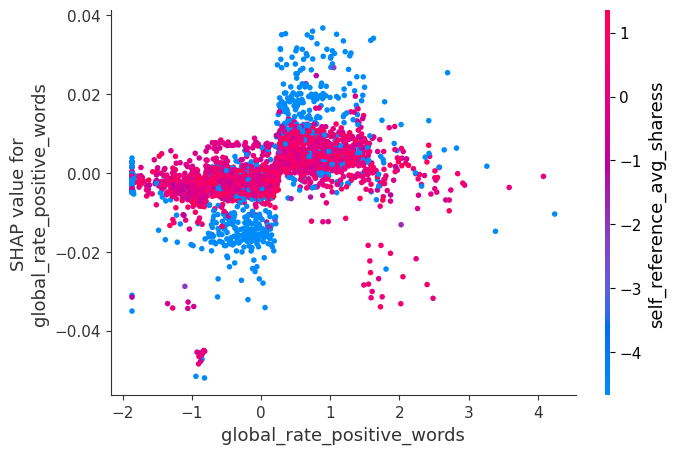

In [ ]:
# prompt: shap으로 내 lgbm_best model의 변수 설명성에 대해 분석해줘.

!pip install shap
import shap
# SHAP analysis for the best LightGBM model
explainer = shap.TreeExplainer(lgbm_best)
shap_values = explainer.shap_values(X_val)

# Summary plot
shap.summary_plot(shap_values, X_val, feature_names=X_val.columns)

# Dependence plots for some important features
shap.dependence_plot("kw_avg_avg", shap_values, X_val, feature_names=X_val.columns)
shap.dependence_plot("n_tokens_content", shap_values, X_val, feature_names=X_val.columns)
shap.dependence_plot("global_rate_positive_words", shap_values, X_val, feature_names=X_val.columns)


6. Test Set Preprocessing

In [ ]:
# Test Set에 대해서도 동일한 전처리 적용하는 함수
def preprocessing(df):
  df = df.drop('id', axis=1)

  numeric_cols = df.select_dtypes(include=['int','float']).columns
  categ_cols = df.select_dtypes(include=['object', 'bool']).columns

  # 결측값 채우기
  df[numeric_cols] = imputer.transform(df[numeric_cols])

  # 개수, 숫자, 비율과 같이 항상 양수인 컬럼에 대해서는 음수 값을 0으로 집어넣기
  for col in cols_with_min_zero:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: max(x, 0))

  # object 컬럼의 결측치는 최빈값으로 채우기
  for col in categ_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

  # Positive Skew + Negative Skew지만 쌍봉분포인 컬럼: Log(x+1) 변환
  for col in positive_skewed_cols:
    df[col] = np.maximum(0, df[col])
    df[col] = np.log1p(df[col])

  # 음수값을 가지는 Negative Skew : 제곱근 변환
  for col in negative_skewed_cols:
    df[col] = np.maximum(0, df[col])
    df[col] = np.sqrt(df[col])

  # 범주형 컬럼 : One-hot encoding
  df = pd.get_dummies(df, columns=categ_cols)

  return df

test_df_preprocessed = preprocessing(test_df)
test_df_preprocessed.head()

In [ ]:
test_df_preprocessed.info()

In [ ]:
test_df_scaled = scaler.transform(test_df_preprocessed)
test_df_scaled = pd.DataFrame(test_df_scaled, columns=test_df_preprocessed.columns)
test_df_scaled

7. Test set 예측 및 예측 결과 저장

In [ ]:
# Test 데이터 예측
# y_predict = 분류 결과
y_predict = voting_clf.predict(test_df_scaled)

# y_prob = 분류 확률
y_prob = voting_clf.predict_proba(test_df_scaled)[:,1]

prediction_df = pd.DataFrame({
    'y_predict': y_predict,
    'y_prob': y_prob
})

# prediction.csv 파일로 저장
prediction_df.to_csv('prediction.csv', index=False)

prediction_df.head()